# 14wk-1: 클래스공부 4단계 – 파이썬의 비밀 (2)

최규빈  
2023-06-05

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/03_Class/2023-06-05-14wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-xEFWxQ9YvfTo0wBN4CUZlP>

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예비학습

## 모티브: 클래스를 수정은 불편해

`-` 예시1: UpJump ver1

In [2]:
class UpJump:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1  
    def __repr__(self):
        return str(self.value)

In [3]:
a = UpJump()
a.up()

In [6]:
a

In [7]:
a.jump(2)

-   점프는 아직 구현하지 않음.

`-` 예시2: UpJump ver2

In [8]:
class UpJump_Ver2:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1  
    def jump(self,jump_size):
        self.value = self.value + jump_size
    def __repr__(self):
        return str(self.value)        

In [9]:
a = UpJump_Ver2()

In [10]:
a.up()

In [11]:
a.jump(2)

In [12]:
a

`-` 예시3: UpJump ver2의 다른 구현

In [13]:
class UpJump_Ver2(UpJump):
    def jump(self,jump_size):
        self.value = self.value + jump_size    

In [14]:
a = UpJump_Ver2()

In [15]:
a.up()

In [16]:
a.jump(2)

In [17]:
a

## 꿀팁

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다.

``` python
class 새로운_클래스_이름(수정할_클래스_이름): 
    def 수정_및_추가할_함수이름(self,...):
        ...
```

`-` 사용예시

In [18]:
class UpJump_Ver3(UpJump_Ver2):
    def __repr__(self):
        return '현재의 이 인스턴스의 value는 {}입니다.'.format(self.value)

In [19]:
a=UpJump_Ver3()

In [20]:
a

In [21]:
a.jump(50)

In [22]:
a

# 클래스공부 4단계: 파이썬의 비밀 (2)

## 비밀6: `__add__`

### ***motive***

`-` 모티브: 아래의 연산구조를 관찰하자.

In [23]:
a=1
b=2 
a+b

-   a라는 인스턴스와 b라는 인스턴스를 +라는 기호가 연결하고 있다.

`-` 이번에는 아래의 연산구조를 관찰하자.

In [24]:
a=[1,2]
b=[3,4]
a+b

-   a라는 인스턴스와 b라는 인스턴스를 +라는 기호가 연결하고 있다.

`-` 동작이 다른 이유?

-   클래스를 배우기 이전: int자료형의 `+`는 “정수의 덧셈”을 의미하고
    list자료형의 `+`는 “자료의 추가”를 의미한다.
-   클래스를 배운 이후: 아마 클래스는 `+`라는 연산을 정의하는 숨겨진
    메소드가 있을것이다. (print가 그랬듯이) 그리고 int클래스에서는 그
    메소드를 “정수의 덧셈”이 되도록 정의하였고 list클래스에서는 그
    메소드를 “자료의 추가”를 의미하도록 정의하였다.

`-` 아래의 결과를 관찰

In [25]:
a=1
b=2

In [29]:
a.__add__(b)

In [30]:
b.__add__(a)

In [31]:
a=[1,2]
b=[3,4]

In [34]:
a.__add__(b) # a+b 

In [35]:
b.__add__(a) # b+a 

`-` 확인: a+b는 사실 내부적으로 `a.__add__(b)`의 축약구문이다.

`-` 추측: 따라서 만약 `a.__add__(b)`의 기능을 바꾸면 (재정의하면) a+b의
기능도 바뀔 것이다.

### ***Student_Ver2: `__add__`의 사용***

`-` Student 클래스 선언

In [68]:
class Student:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print("입학을 축하합니다. 당신의 나이는 {}이고 현재 학기는 {}학기 입니다.".format(self.age,self.semester))
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age=self.age+0.5
        elif registration_status=='등록':
            self.age=self.age+0.5 
            self.semester= self.semester+1 
    def _repr_html_(self):
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

`-` 사용

In [69]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [70]:
boram

In [71]:
boram + '등록'
boram

In [72]:
boram + '휴학'
boram

`-` 잘못된 사용

In [49]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [54]:
boram + '등록'+ '휴학' + '등록' + '휴학'

-   에러가?

`-` 올바른 코드

In [55]:
class Student_Ver2:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print("입학을 축하합니다. 당신의 나이는 {}이고 현재 학기는 {}학기 입니다.".format(self.age,self.semester))
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age = self.age+0.5
        elif registration_status=='등록':
            self.age = self.age+0.5 
            self.semester = self.semester+1 
        return self 
    def _repr_html_(self):
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

In [56]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [61]:
boram + "등록"

### ***Student_Ver2의 다른구현1***

In [73]:
class Student_Ver2(Student):
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age = self.age+0.5
        elif registration_status=='등록':
            self.age = self.age+0.5 
            self.semester = self.semester+1 
        return self

In [74]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [75]:
boram + '등록'+ '휴학' + '등록' + '휴학'

### ***Student_Ver2의 다른구현2***

-   요거까지는 지금 몰라도 됩니다

In [80]:
class Student_Ver2(Student):
    def __add__(self,registration_status): 
        super().__add__(registration_status)
        return self

In [81]:
boram = Student_Ver2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [82]:
boram + '등록' + '휴학' + '등록' + '휴학'

> 파이썬의 비밀6: `a+b`는 사실 `a.__add__(b)`의 축약형이다.

## 비밀7: `__getitem__`

### ***motive***

In [83]:
a=[11,22,32]

In [84]:
a[0]

-   이거 좋아보인다?

In [87]:
a.__getitem__(0) # a[0]

-   이런거였어?

### ***RPS_Ver2: `__getitem__`의 사용***

In [88]:
class RPS:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
    def pick(self):
        self.actions.append(np.random.choice(self.candidate))        
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/>
        기록: {}
        """        
        return html_str.format(self.candidate,self.actions)

In [92]:
a = RPS(['가위','바위','보'])

In [96]:
a.pick()
a.pick()

In [97]:
a.actions

In [100]:
a[0], a[1]

-   결과가 ‘가위’, ’바위’로 나오면 좋겠다.. 물론 지금은 불가능해

In [104]:
class RPS_Ver2(RPS):
    def __getitem__(self,item):
        return self.actions[item]

In [105]:
a = RPS_Ver2(['가위','바위','보'])

In [106]:
a.pick()
a.pick()
a.pick()

In [107]:
a

In [116]:
a[0]

In [117]:
a[:2]

> 파이썬의 비밀7: `a[0]`는 `a.__getitem__(0)`의 축약형이다.

## 비밀8: `__setitem__`

### ***motive***

In [118]:
a = RPS_Ver2(['가위','바위'])
a

In [119]:
a.pick()
a.pick()
a

In [120]:
a[0]

In [121]:
a[0] = '보' 

-   경우에 따라서는 이런 문법이 필요하기도 하다.

### ***RPS_Ver3: `__setitem__` 사용***

`-` 관찰

In [123]:
lst = [1,2,3]

In [124]:
lst.__setitem__(0,11)

In [125]:
lst

`-` RPS예제

In [126]:
class RPS_Ver3(RPS_Ver2):
    def __setitem__(self,index,val):
        self.actions[index] = val

In [127]:
a=RPS_Ver3(['가위','바위','보'])

In [128]:
a.pick()

In [129]:
a

In [131]:
a[0]='가위'

In [132]:
a

> 파이썬의 비밀8: `a[0]=11`는 `a.__setitem__(0,11)`의 축약형이다.

## 비밀9: `__len__`

### ***motive***

In [139]:
a= RPS_Ver3(['가위','바위','보'])
a

In [140]:
a.pick()
a.pick()
a.pick()

In [141]:
a

In [142]:
a[0],a[1],a[2]

In [143]:
len(a)

### ***RPS_Ver4: `__len__` 의 사용***

In [145]:
class RPS_Ver4(RPS_Ver2):
    def __len__(self):
        return len(self.actions)

In [146]:
a = RPS_Ver4(['가위','바위','보'])
a

In [147]:
a.pick()
a.pick()
a.pick()
a.pick()

In [148]:
a

In [149]:
a.__len__() # len(a.actions)

In [150]:
len(a) # a.__len__()

> 파이썬의 비밀9: `a.__len__()`는 `len(a)`의 축약형이다.

## 비밀10: 비교연산자

### ***motive1***

In [153]:
a = RPS_Ver4(['가위'])
b = RPS_Ver4(['가위'])

In [154]:
a.pick()
b.pick()

In [155]:
a

In [156]:
b

In [158]:
a == b

-   `가위 == 가위` 이면 True가 나오면 좋겠구만..

In [160]:
a[-1] == b[-1] 

-   이렇게 하면 되긴하지..

### ***RPS_Ver5: `__eq__` 의 사용***

`-` 관찰

In [161]:
a = 1

In [164]:
a.__eq__(1) # a == 1

In [167]:
a.__eq__(2) # a == 2 

`-` 구현

In [216]:
class RPS_Ver5(RPS_Ver4):
    def __eq__(self,other):
        return self[-1] == other[-1]

In [217]:
a = RPS_Ver5(['가위','바위'])
b = RPS_Ver5(['가위','바위'])

`-` 1회 대결

In [218]:
a.pick()
b.pick()

In [219]:
a

In [220]:
b

In [221]:
a == b

`-` 2회 대결

In [222]:
a.pick()
b.pick()

In [223]:
a

In [224]:
b

In [225]:
a == b

`-` 3회 대결

In [226]:
a.pick()
b.pick()

In [227]:
a

In [228]:
b

In [229]:
a == b

### ***motive2***

In [185]:
a[-1], b[-1]

In [186]:
a > b

-   False 가 나오면 좋겟구만..

### ***RPS_Ver6: `__gt__` 의 사용***

`-` 관찰

In [187]:
a = 1

In [188]:
a.__gt__(1) # a>1

In [189]:
a.__gt__(0) # a>0 

`-` **예비학습**

In [232]:
[a[-1],b[-1]]

In [233]:
[a[-1],b[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

`-` 구현

In [234]:
class RPS_Ver6(RPS_Ver5):
    def __gt__(self,other):
        return [self[-1],other[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

In [235]:
a = RPS_Ver6(['가위','바위','보'])
b = RPS_Ver6(['가위','바위','보'])

`-` 1회대결

In [236]:
a.pick() 
b.pick()

In [237]:
a

In [238]:
b

In [240]:
a>b, a==b

`-` 2회대결

In [241]:
a.pick() 
b.pick()

In [242]:
a

In [243]:
b

In [245]:
a>b, a==b

### ***motive3***

In [246]:
a

In [247]:
b

In [248]:
a>=b

-   True로 나오면 좋겠구만..

In [249]:
a < b

-   이것도 정의 새로 해야겠는걸?

### ***RPS_Ver7: `__ge__`, `__lt__`, `__le__` 의 사용***

`-` 관찰: 생략

`-` 비교연산자 정리

| 특수메소드 |      의미       |
|:----------:|:---------------:|
|  `__eq__`  | `self == other` |
|  `__gt__`  | `self > other`  |
|  `__lt__`  | `self < other`  |
|  `__ge__`  | `self >= other` |
|  `__le__`  | `self <= other` |

`-` 구현

In [252]:
class RPS_Ver7(RPS_Ver6):
    def __ge__(self,other):
        return (self == other) or (self > other)
    def __lt__(self,other):
        return not (self >= other)
    def __le__(self,other):
        return (self == other) or (self < other)

In [258]:
a = RPS_Ver7(['가위','바위','보'])
b = RPS_Ver7(['가위','바위','보'])

In [259]:
a.pick()
b.pick()

In [260]:
a

In [261]:
b

In [262]:
a==b, a>b, a<b, a>=b, a<=b 

> 파이썬의 비밀10: `__eq__`, `__gt__`, `__lt__`, `__ge__`, `__le__`는
> 각각 `==`, `>`, `<`, `>=`, `<=` 를 재정의한다.

## 비밀11: `__call__` $(\star\star\star)$

### ***함수공부***

`-` 다시 함수를 공부해봅시다.

In [264]:
def f(x):
    return x+1 

In [265]:
f(3)

`-` 함수의 사용방법?

-   입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
-   출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를
출력한다.

`-` 함수의 자료형?

In [266]:
?f

-   type이 function이다.
-   f는 function class의 instance이다.
-   결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -\> 함수의 입력으로 함수를 쓸 수도
있고 함수의 출력으로 함수가 나올 수도 있다.

> “파이썬의 모든 것은 오브젝트이다.” \<– 명언처럼 외우세여

### ***함수도 인스턴스다***

(예제1) 숫자입력, 함수출력

In [268]:
def f(a):
    def _f(x):
        return (x-a)**2 
    return _f

In [269]:
g=f(10) # g(x)=(x-10)**2 

In [270]:
g(2) # (2-10)**2 = 64

-   해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를
    리턴해주는 함수

(예제1)의 다른표현: 익명함수 lambda

In [271]:
def f(x):
    return x+1

In [280]:
f= lambda x: x+1

표현1

In [281]:
def f(a):
    _f = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f 로 저장됨 
    return _f

In [282]:
g=f(10) # g(x)=(x-10)**2 

In [283]:
g(3) # (3-10)**2 = 49

표현2

In [286]:
def f(a):
    return lambda x: (x-a)**2 

In [287]:
g=f(10) # g(x)=(x-10)**2 

In [288]:
g(3) # (3-10)**2 = 49

-   `lambda x: (x-a)**2` 는 $\text{lambda}(x) = (x-a)^2$의 느낌으로
    기억하면 외우기 쉽다.
-   `lambda x: (x-a)**2` 는 “아직 이름이 없는 함수오브젝트를 (가칭
    lambda 라고 하자) 만들고 기능은 `x`를 입력으로 하고 `(x-a)**2`를
    출력하도록 하자” 라는 뜻으로 해석하면 된다.

(예제2) 함수입력, 숫자출력

In [295]:
def d(f,x): # 함수를 입력을 받는 함수를 정의 
    h=0.000000000001
    return (f(x+h)-f(x))/h 

In [298]:
d(f,4) # f'(4) = 2*4 = 8

(예제3) 함수입력, 함수출력

In [299]:
def f(x): 
    return x**2 

In [307]:
def derivate(f): 
    # step1: 함수오브젝트 f는 입력으로 받은상태 
    # step2: 함수오브젝트 f를 이용하여 df라는 함수를 정의 
    def df(x): 
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    # step3: 정의된 df를 리턴
    return df

In [308]:
ff = derivate(f)

In [309]:
ff(7) # f의 도함수

**원래함수 시각화**

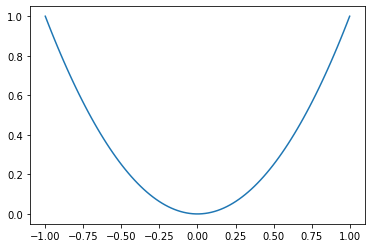

In [310]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

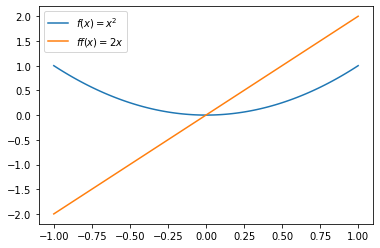

In [311]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제3)의 다른표현

In [312]:
def f(x): 
    return x**2 

In [314]:
def derivate(f): 
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h 

In [315]:
ff = derivate(f)

In [316]:
ff(10)

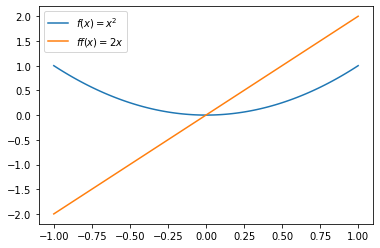

In [317]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

(예제4) 함수들의 리스트

In [318]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3] 
flst

In [324]:
for f in flst:
    print(f(2))

2
4
8

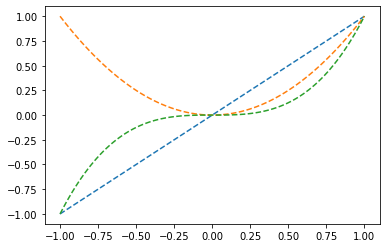

In [325]:
for f in flst: 
    plt.plot(x,f(x),'--')

위의코드는 아래와 같음

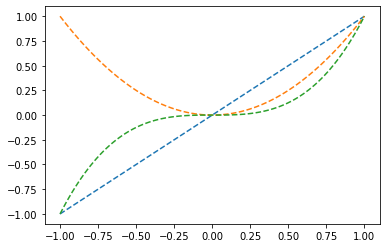

In [326]:
plt.plot(x,(lambda x: x)(x),'--')
plt.plot(x,(lambda x: x**2)(x),'--')
plt.plot(x,(lambda x: x**3)(x),'--')

### ***정리***

`-` 지금까지 개념

-   함수: 변수를 입력으로 받아서 변수를 출력하는 개념
-   변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로
    사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘
쓰려면?)

-   변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은
    오브젝트라는 의미)
-   변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와
    같은 함수로 쓸 수 있음
-   함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로
    쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도
    있다.

### ***callable object***

`-` 함수 오브젝트의 비밀?

In [327]:
f = lambda x: x+1 

In [330]:
a=11

In [328]:
set(dir(f)) & {'__call__'}

-   함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [332]:
f.__call__(3) # f(3)

In [333]:
f.__call__(4) # f(4)

-   여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [334]:
class Klass: 
    def __init__(self):
        self.name='guebin'

In [335]:
a=Klass()

In [336]:
a()

-   a는 callable이 아니라고 한다.

In [338]:
class Klass2(Klass): 
    def __call__(self):
        print(self.name)

In [339]:
b=Klass2()

In [340]:
b()

guebin

-   b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
-   Klass는 callable object를 만들지 못하지만 Klass2는 callable object를
    만든다.

`-` 클래스로 함수를 만들기 (=함수인스턴스를 찍어내는 클래스 설계)

In [341]:
class AddConstant: 
    def __init__(self,const):
        self.const = const 
    def __call__(self,x):
        return x + self.const

In [342]:
f = AddConstant(3) # callable object생성, f.const에는 3이 저장되어있음. 

In [343]:
f(5) # f.const 와 5를 더하는 기능을 수행, # 즉 f(x) = x+3 을 수행함

In [344]:
f(10) 

`-` 클래스도 그러고 보니까 `오브젝트` 아니었나?

In [345]:
Student_Ver2?

-   이것도 type 이라는 또 다른 클래스에서 (클래스를 찍는 클래스) 찍힌
    오브젝트이구나..

`-` 클래스 “오브젝트”도 함수 “오브젝트”처럼 `Student_Ver2()`와 같이
사용하면 인스턴스를 만들었음. -\> `Student_Ver2.__call__()` 은
`Student_Ver2()`와 같은 역할을 할 것이다.

***일반적인 구현에서 “클래스 $\to$ 인스턴스” 과정***

In [347]:
boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [348]:
boram + '등록' + '휴학' + '휴학'

***공부를 위해 call을 이용해본 “클래스 $\to$ 인스턴스” 과정***

In [351]:
boram = Student_Ver2.__call__(age=20.0,semester=0) #
# boram = Student_Ver2(age=20.0,semester=0)

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [352]:
boram + '등록' + '휴학' + '휴학'

> 파이썬의 비밀11: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이
> 정의되어있는 오브젝트일 뿐이다.

# 숙제 - 2022년 파이썬 입문 기말고사 참고

`(1)` 플레이어A는 (가위,가위) 중 하나를 선택할 수 있고 플레이어B는
(가위,바위) 중 하나를 선택할 수 있다. 각 플레이어는 각 패 중 하나를
랜덤으로 선택하는 액션을 한다고 가정하자. 아래에 해당하는 확률을
시뮬레이션을 이용하여 추정하라.

-   플레이어A가 승리할 확률:
-   플레이어B가 승리할 확률:
-   플레이어A와 플레이어B가 비길 확률:

> **Note**
>
> **hint**: 50% 확률로 b가 승리하고 50% 확률로 비긴다.

`(2)` 문제 (1)과 같이 아래의 상황을 가정하자.

|                                         |  플레이어A  |  플레이어B  |
|:---------------------------------------:|:-----------:|:-----------:|
| 각 플레이어가 낼 수 있는 패 (candidate) | (가위,가위) | (가위,바위) |
|       각 패를 선택할 확률 (prob)        |  (0.5,0.5)  |  (0.5,0.5)  |

각 플레이어는 아래와 같은 규칙으로 가위바위보 결과에 따른 보상점수를
적립한다고 하자.

-   승리: 보상점수 2점 적립
-   무승부: 보상점수 1점 적립
-   패배: 보상점수 0점 적립

100번째 대결까지 시뮬레이션을 시행하고 플레이어B가 가위를 낼 경우 얻은
보상점수의 총합과 바위를 낼 경우 얻은 보상점수의 총합을 각각 구하라.
플레이어B는 가위를 내는것이 유리한가? 바위를 내는것이 유리한가?

> **Note**
>
> **hint1**: 플레이어B는 바위를 내는 것이 유리하다.
>
> **hint2**: 플레이어B가 100번중에 49번 가위를 내고 51번 바위를 낸다면
> 플레이어B가 적립할 보상점수는 각각 아래와 같다.
>
> -   가위를 내었을 경우: 49 \* 1 = 49점
> -   바위를 내었을 경우: 51 \* 2 = 102점
> -   총 보상점수 = 49점 + 102점 = 151점

`(3)` (2)에서 얻은 데이터를 **학습**하여 플레이어B가 “가위” 혹은 “바위”
를 선택할 확률을 매시점 조금씩 조정한다고 가정하자. 구체적으로는
현재시점까지 얻은 보상점수의 비율로 확률을 결정한다. 예를들어
플레이어B가 100회의 대결동안 누적한 보상점수의 총합이 아래와 같다고
하자.

-   가위를 내었을 경우 보상점수 총합 = 50점
-   바위를 내었을 경우 보상점수 총합 = 100점

그렇다면 플레이어B는 각각 (50/150,100/150) 의 확률로 (가위,바위) 중
하나를 선택한다. 101번째 대결에 플레이어B가 가위를 내서 비겼다면
이후에는 (51/151,100/151) 의 확률로 (가위,바위) 중 하나를 선택한다.
102번째 대결에 플레이어B가 바위를 내서 이겼다면 이후에는 각각
(51/153,102/153) 의 확률로 (가위,바위) 중 하나를 선택한다. 이러한 상황을
요약하여 표로 정리하면 아래와 같다.

| 시점  | 플레이어B가 가위를 냈을 경우 얻은 점수 총합 | 플레이어B가 바위를 냈을 경우 얻은 점수 총합 | t+1시점에서 플레이어B가 (가위,바위)를 낼 확률 |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t=100 |                     50                      |                     100                     |               (50/150, 100/150)               |
| t=101 |                     51                      |                     100                     |               (51/151, 100/151)               |
| t=102 |                     51                      |                     102                     |               (51/153, 102/153)               |

이러한 방식으로 500회까지 게임을 진행하며 확률을 수정하였을 경우 501번째
대결에서 플레이어B가 (가위,바위)를 낼 확률은 각각 얼마인가?

> **Note**
>
> **hint: 시간이 지날수록 플레이어B는 (가위,바위)중 바위를 내는 쪽이
> 유리하다는 것을 알게 될 것이다.**

------------------------------------------------------------------------

앞으로 아래와 같은 용어를 사용한다.

> **정의: 학습모드상태**
>
> 어떠한 플레이어가 양손 중 하나를 선택하는 확률을 데이터를 바탕으로 매
> 순간 업데이트 한다면 그 플레이어는 ***“학습모드 상태이다”***라고
> 표현한다. 반대로 어떠한 플레이어가 양손 중 하나를 항상 동일한 확률로
> 낸다면 그 플레이어는 ***“학습모드 상태가 아니다”*** 라고 표현한다.

------------------------------------------------------------------------

`(4)` 새로운 두명의 플레이어C와 플레이어D를 만들어라. 두 플레이어는 모두
동일하게 (가위,바위) 중 하나를 선택할 수 있다. 두 명의 플레이어는
100번째 대결까지는 두 가지 패중 하나를 랜덤하게 선택하고 101번째
대결부터 500번째 대결까지는 문제(3)의 플레이어B와 같은 방식으로 확률을
업데이트 하여 두 가지 패를 서로 다른 확률로 낸다고 하자. 즉 100번째
대결까지는 두 플레이어가 모두 학습모드 상태가 아니고 101번째부터 500번째
대결까지는 두 플레이어가 모두 학습모드 상태이다. 500번째 대결까지의
학습이 끝났을 경우 플레이어 C와 플레이어D가 각 패를 낼 확률은 각각
얼마인가?

|   시점    | 플레이어C가 (가위,바위)를 낼 확률  | 플레이어D가 (가위,바위)를 낼 확률  |                비고                |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t \<= 100 |             (1/2, 1/2)             |             (1/2, 1/2)             | 양쪽 플레이어 모두 학습모드가 아님 |
| t \<= 500 | 대결 데이터를 학습하여 수정한 확률 | 대결 데이터를 학습하여 수정한 확률 |   양쪽 플레이어 모두 학습모드임    |

> **Note**
>
> **hint: 시간이 지날수록 두 플레이어 모두 바위를 내는 쪽이 유리하다는
> 것을 알게 될 것이다.**

`(5)` 새로운 플레이어 E와 F를 생각하자. 플레이어E와 플레이어F는 각각
(가위,바위) 그리고 (가위,보) 중 하나를 선택할 수 있다고 가정하자.
시뮬레이션 대결결과를 이용하여 아래의 확률을 근사적으로 추정하라.

-   플레이어E가 승리할 확률:
-   플레이어F가 승리할 확률:
-   플레이어E와 플레이어F가 비길 확률:

> **Note**
>
> **hint: 플레이어E가 가위를 낸다면 최소한 지지는 않기 때문에
> 플레이어E가 좀 더 유리한 패를 가지고 있다. 따라서 플레이어E의 결과가
> 더 좋을 것이다.**

`(6)` (5)와 동일한 두 명의 플레이어E, F를 생각하자. 두 플레이어는
100회까지는 랜덤으로 자신의 패를 선택한다. 그리고 101회부터 500회까지는
플레이어F만 데이터로 부터 학습을 하여 수정된 확률을 사용한다. 500번의
대결이 끝나고 플레이어F가 (가위,보)를 선택하는 확률이 어떻게 업데이트
되어있는가?

|   시점    | 플레이어E가 (가위,바위)를 낼 확률 | 플레이어F가 (가위,보)를 낼 확률 |                      비고                       |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t \<= 100 |            (1/2, 1/2)             |           (1/2, 1/2)            |       양쪽 플레이어 모두 학습모드가 아님        |
| t \<= 500 |            (1/2, 1/2)             |  데이터를 학습하여 수정한 확률  | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |

> **Note**
>
> **hint: 플레이어F는 보를 내는 것이 낫다고 생각할 것이다. (가위를 내면
> 지거나 비기지만 보를 내면 지거나 이긴다.)**

`(7)` (6)번의 플레이어E와 플레이어F가 500회~1000회까지 추가로 게임을
한다. 이번에는 플레이어E만 데이터로부터 학습한다. 1000회까지 대결을 끝낸
이후 플레이어E가 (가위,바위)를 내는 확률은 어떻게 업데이트 되었는가?

|    시점    | 플레이어E가 (가위,바위)를 낼 확률 | 플레이어F가 (가위,보)를 낼 확률 |                      비고                       |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t \<= 100  |            (1/2, 1/2)             |           (1/2, 1/2)            |       양쪽 플레이어 모두 학습모드가 아님        |
| t \<= 500  |            (1/2, 1/2)             |  데이터를 학습하여 수정한 확률  | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |
| t \<= 1000 |   데이터를 학습하여 수정한 확률   |   t=500시점에 업데이트된 확률   | 플레이어E는 학습모드 / 플레이어F는 학습모드아님 |

> **Note**
>
> **hint: 플레이어F는 보를 내도록 학습되어 있다. 따라서 플레이어E가
> 바위를 내면 지고 가위를 내면 이길것이다. 따라서 플레이어E는 가위가
> 유리하다고 생각할 것이다.**

`(8)` (7)번의 플레이어E와 플레이어F가 1000회~30000회까지 추가로 게임을
한다. 이번에는 플레이어F만 데이터로부터 학습한다. 30000회까지 대결을
끝낸 이후 플레이어F가 (가위,보)를 내는 확률은 어떻게 업데이트 되었는가?

|    시점     | 플레이어E가 (가위,바위)를 낼 확률 | 플레이어F가 (가위,보)를 낼 확률 |                      비고                       |
|:----------------:|:----------------:|:----------------:|:----------------:|
|  t \<= 100  |            (1/2, 1/2)             |           (1/2, 1/2)            |       양쪽 플레이어 모두 학습모드가 아님        |
|  t \<= 500  |            (1/2, 1/2)             |  데이터를 학습하여 수정한 확률  | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |
| t \<= 1000  |   데이터를 학습하여 수정한 확률   |   t=500시점에 업데이트된 확률   | 플레이어E는 학습모드 / 플레이어F는 학습모드아님 |
| t \<= 30000 |   t=1000시점에 업데이트된 확률    |  데이터를 학습하여 수정한 확률  | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |

> **Note**
>
> **hint: 플레이어F는 원래 보가 유리하다고 생각하여 보를 자주 내도록
> 학습되었다. 하지만 플레이어E가 그러한 플레이어F의 성향을 파악하고
> 가위를 주로 내도록 학습하였다. 플레이어F는 그러한 플레이어E의 성향을
> 다시 파악하여 이번에는 가위을 자주 내는 것이 유리하다고 생각할
> 것이다.**

`(9)` 플레이어E와 플레이어F의 대결기록을 초기화 한다. 이번에는
플레이어F가 항상 (3/4)의 확률로 가위를 (1/4)의 확률로 보를 낸다고
가정한다. 플레이어E는 100번의 대결까지는 랜덤으로 (가위,바위)중 하나를
내고 101번째 대결부터 1000번째 대결까지는 대결 데이터를 학습하여 수정한
확률을 사용한다고 하자. 1000번째 대결이후에 플레이어E가 (가위,바위)를
내는 확률이 어떻게 업데이트 되어있는가?

|    시점    | 플레이어E가 (가위,바위)를 낼 확률 | 플레이어F가 (가위,보)를 낼 확률 |                       비고                       |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t \<= 100  |            (1/2, 1/2)             |           (3/4, 1/4)            |        양쪽 플레이어 모두 학습모드가 아님        |
| t \<= 1000 |   데이터를 학습하여 수정한 확률   |           (3/4, 1/4)            | 플레이어E는 학습모드 / 플레이어F는 학습모드 아님 |

`(10)` 플레이어E와 플레이어F의 대결기록을 초기화 한다. 이번에는
플레이어F가 항상 (2/3)의 확률로 가위를 (1/3)의 확률로 보를 낸다고
가정한다. 플레이어E는 100번의 대결까지는 랜덤으로 (가위,바위)중 하나를
내고 101번째 대결부터 1000번째 대결까지는 대결 데이터를 학습하여 수정한
확률을 사용한다고 하자. 1000번째 대결이후에 플레이어E가 (가위,바위)를
내는 확률이 어떻게 업데이트 되어있는가?

|    시점    | 플레이어E가 (가위,바위)를 낼 확률 | 플레이어F가 (가위,보)를 낼 확률 |                       비고                       |
|:----------------:|:----------------:|:----------------:|:----------------:|
| t \<= 100  |            (1/2, 1/2)             |           (2/3, 1/3)            |        양쪽 플레이어 모두 학습모드가 아님        |
| t \<= 1000 |   데이터를 학습하여 수정한 확률   |           (2/3, 1/3)            | 플레이어E는 학습모드 / 플레이어F는 학습모드 아님 |